# Computers represent letters as numbers, and that has all sorts of weird implications

By [Allison Parrish](http://www.decontextualize.com/)

In [1]:
import random

## Opening a text file

The following bit of code opens a text file in the same directory as this notebook and reads it into a string.

In [2]:
text = open("wikipedia-emoji.txt").read()

The `print()` function will display the string, interpolating formatting characters like `\n`:

In [3]:
print(text)

Emoji (Japanese: 絵文字, English: /ɪˈmoʊdʒiː/; Japanese: [emodʑi]; singular emoji, plural emoji or emojis) are ideograms and smileys used in electronic messages and web pages. Emoji exist in various genres, including facial expressions, common objects, places and types of weather, and animals. They are much like emoticons, but emoji are actual pictures instead of typographics. Originally meaning pictograph, the word emoji comes from Japanese e (絵, "picture") + moji (文字, "character"); the resemblance to the English words emotion and emoticon is purely coincidental. The ISO 15924 script code for emoji is Zsye.

Originating on Japanese mobile phones in 1997, emoji became increasingly popular worldwide in the 2010s after being added to several mobile operating systems. They are now considered to be a large part of popular culture in the west. In 2015, Oxford Dictionaries named the Face with Tears of Joy emoji (😂) the Word of the Year.



You can artificially introduce linebreaks to make it a little bit more readable using the `textwrap.fill()` function, though this will obliterate any existing linebreaks:

In [4]:
import textwrap

In [5]:
print(textwrap.fill(text, 55))

Emoji (Japanese: 絵文字, English: /ɪˈmoʊdʒiː/; Japanese:
[emodʑi]; singular emoji, plural emoji or emojis) are
ideograms and smileys used in electronic messages and
web pages. Emoji exist in various genres, including
facial expressions, common objects, places and types of
weather, and animals. They are much like emoticons, but
emoji are actual pictures instead of typographics.
Originally meaning pictograph, the word emoji comes
from Japanese e (絵, "picture") + moji (文字,
"character"); the resemblance to the English words
emotion and emoticon is purely coincidental. The ISO
15924 script code for emoji is Zsye.  Originating on
Japanese mobile phones in 1997, emoji became
increasingly popular worldwide in the 2010s after being
added to several mobile operating systems. They are now
considered to be a large part of popular culture in the
west. In 2015, Oxford Dictionaries named the Face with
Tears of Joy emoji (😂) the Word of the Year.


## Characters have numbers

For better or worse, the primary conceptual model of text in a computational context is this: text is a one-dimensional sequence of characters. Computers operate internally only on numbers; therefore, characters must be represented as numbers. The `ord()` function in Python evaluates to the number associated with a particular character. For example:

In [6]:
ord('a')

97

The character `a` is represented by the number 97. You can get the character that corresponds to a given number with the `chr()` function:

In [7]:
chr(97)

'a'

These functions are exact inverses of one another, so calling them in a nested fashion like so should always return the original value:

In [8]:
ord(chr(97))

97

In [9]:
chr(ord('a'))

'a'

Now you can do a little bit of exploring. Put some other numbers in there and see what you can discover:

In [10]:
chr(1000)

'Ϩ'

Maybe even use a random number generator to find things:

In [11]:
for i in range(10):
    print(chr(random.randrange(5000)))

ɨ
ș
Қ
૙
ቤ
ݙ
ൌ
ႍ
³
Δ


Depending on your browser, operating system, and browser font stack, sometimes you'll see a replacement character ("�"), a small box with a number in a pixel font, or an empty space. These indicate that either (a) the browser can't render the character (e.g., because you don't have a font on your computer that has that character) or (b) the number you specified doesn't correspond to a valid character. The character might also just be one of several characters that represent whitespace!

The numbers that Python uses to represent characters are the same numbers as Unicode code points. You can use [a tool like this Unicode Character Table](https://unicode-table.com/en/) to look up characters by name (or browse characters) to find their Unicode codepoint. Usually these are written like `U+1F336`—the number following the `+` is a hexidecimal number. (We'll talk more about Unicode and hexidecimal numbers below.) You can pass a Unicode codepoint value directly to the `chr()` function in Python by prepending it with `0x`:

In [12]:
chr(0x1F336)

'🌶'

The `ord()` function works for any Unicode character, btw:

In [13]:
ord('😻')

128571

You can get the codepoint by formatting this as a hexidecimal number:

In [14]:
hex(ord('😻'))

'0x1f63b'

### Doing math on character numbers

Having realized that computers represent characters as numbers, there's nothing stopping us from doing weird things with those numbers... like adding them together:

In [15]:
chr(ord('a') + ord('b'))

'Ã'

Or multiplying them:

In [16]:
chr(ord('a') * 4)

'Ƅ'

Or adding some random noise to them:

In [17]:
chr(ord('a') + random.randrange(-5, 5))

'c'

Let's make two different strings just to play around with:

In [18]:
msg_a = "mother said there'd be days like these"
msg_b = "suppose there was a pigeon, suppose there is"

Using a list comprehension, we can apply arithmetical transformations to an entire string. We'll start with the following expression:

In [19]:
''.join([chr(ord(c)) for c in msg_a])

"mother said there'd be days like these"

This expression simply evaluates to a copy of the original string by converting the number of each character back to its original character. But we can tweak it a little bit by putting an expression inside the call to `chr()`, using the value of the `ord()` function as part of an arithmetic expression. This expression adds one to the value of each character:

In [20]:
''.join([chr(ord(c) + 1) for c in msg_a])

'npuifs!tbje!uifsf(e!cf!ebzt!mjlf!uiftf'

And this multiplies the value of each character by two:

In [21]:
''.join([chr(ord(c) * 2) for c in msg_a])

'ÚÞèÐÊä@æÂÒÈ@èÐÊäÊNÈ@ÄÊ@ÈÂòæ@ØÒÖÊ@èÐÊæÊ'

This expression "transposes" the string to a different Unicode range. (Replace `0x1F300` with the Unicode codepoint that starts a range of characters you're interested in.)

In [22]:
''.join([chr(ord(c) + 0x1F300) for c in msg_a])

'🍭🍯🍴🍨🍥🍲🌠🍳🍡🍩🍤🌠🍴🍨🍥🍲🍥🌧🍤🌠🍢🍥🌠🍤🍡🍹🍳🌠🍬🍩🍫🍥🌠🍴🍨🍥🍳🍥'

Using a `for` loop, each line adds one more to each character than the line previous:

In [23]:
for i in range(10):
    print(''.join([chr(ord(c)+i) for c in msg_a]))

mother said there'd be days like these
npuifs!tbje!uifsf(e!cf!ebzt!mjlf!uiftf
oqvjgt"uckf"vjgtg)f"dg"fc{u"nkmg"vjgug
prwkhu#vdlg#wkhuh*g#eh#gd|v#olnh#wkhvh
qsxliv$wemh$xlivi+h$fi$he}w$pmoi$xliwi
rtymjw%xfni%ymjwj,i%gj%if~x%qnpj%ymjxj
suznkx&ygoj&znkxk-j&hk&jgy&roqk&znkyk
tv{oly'zhpk'{olyl.k'il'khz'sprl'{olzl
uw|pmz({iql(|pmzm/l(jm(li{(tqsm(|pm{m
vx}qn{)|jrm)}qn{n0m)kn)mj|)urtn)}qn|n


This code is a bit more sophisticated: it attempts to "average" two strings, by summing two strings character-wise, then finding the character whose number is closest to the sum divided by two:

In [24]:
out = ""
longest_length = max(len(msg_a), len(msg_b))
pad_a = msg_a.ljust(longest_length)
pad_b = msg_b.ljust(longest_length)
for i in range(longest_length):
    avg_val = (ord(pad_a[i]) + ord(pad_b[i])) / 2
    avg_chr = chr(round(avg_val))
    out += avg_chr
print(msg_a)
print(msg_b)
print(out)

mother said there'd be days like these
suppose there was a pigeon, suppose there is
prrljrBJjhdIlDnjl$b igDdhtP ponjHtfBtfBIB DJ


You don't have to start with an existing string. You can generate your own data. Here's a sine wave:

In [25]:
import math

In [26]:
''.join([chr(int(102 + (math.sin(i*0.25)*5))) for i in range(80)])

'fghijjjjjihgfedcbaaaaabcdeghijjjjjiihfedcbaaaaabcdefhijjjjjjihgedcbaaaaabcdefgii'

### Other arithmetic operations

The largest and smallest numbers in the string:

In [27]:
max(msg_a)

'y'

In [28]:
min(msg_a)

' '

The sum of the values in the string:

In [29]:
sum([ord(c) for c in msg_a])

3529

The "average" character in the string:

In [30]:
avg = sum([ord(c) for c in msg_a]) / len(msg_a)
avg

92.86842105263158

In [31]:
chr(round(avg))

']'

## Unicode

As mentioned above, the numbers that Python associates with each character are their Unicode codepoint values. Unicode is a widely-used standard for representing text in computers; its primary purpose is to be a standard for which characters are associated with which numbers. Each character has a number, a description, and other associated metadata. New characters (with new numbers) can be added to Unicode through agreement of the Unicode Consortium. Python comes with a Unicode database built-in; you can use it to look up the names and metadata of characters:

In [32]:
import unicodedata

In [33]:
unicodedata.name('😻')

'SMILING CAT FACE WITH HEART-SHAPED EYES'

Rewriting a string as a sequence of the Unicode names of its characters:

In [34]:
for ch in msg_a:
    print(unicodedata.name(ch))

LATIN SMALL LETTER M
LATIN SMALL LETTER O
LATIN SMALL LETTER T
LATIN SMALL LETTER H
LATIN SMALL LETTER E
LATIN SMALL LETTER R
SPACE
LATIN SMALL LETTER S
LATIN SMALL LETTER A
LATIN SMALL LETTER I
LATIN SMALL LETTER D
SPACE
LATIN SMALL LETTER T
LATIN SMALL LETTER H
LATIN SMALL LETTER E
LATIN SMALL LETTER R
LATIN SMALL LETTER E
APOSTROPHE
LATIN SMALL LETTER D
SPACE
LATIN SMALL LETTER B
LATIN SMALL LETTER E
SPACE
LATIN SMALL LETTER D
LATIN SMALL LETTER A
LATIN SMALL LETTER Y
LATIN SMALL LETTER S
SPACE
LATIN SMALL LETTER L
LATIN SMALL LETTER I
LATIN SMALL LETTER K
LATIN SMALL LETTER E
SPACE
LATIN SMALL LETTER T
LATIN SMALL LETTER H
LATIN SMALL LETTER E
LATIN SMALL LETTER S
LATIN SMALL LETTER E


The same thing, but for a longer string:

In [35]:
names = []
for ch in text:
    if ord(ch) < 32: # unicode names aren't defined for these...?
        continue
    names.append(unicodedata.name(ch))
print(", ".join(names))

LATIN CAPITAL LETTER E, LATIN SMALL LETTER M, LATIN SMALL LETTER O, LATIN SMALL LETTER J, LATIN SMALL LETTER I, SPACE, LEFT PARENTHESIS, LATIN CAPITAL LETTER J, LATIN SMALL LETTER A, LATIN SMALL LETTER P, LATIN SMALL LETTER A, LATIN SMALL LETTER N, LATIN SMALL LETTER E, LATIN SMALL LETTER S, LATIN SMALL LETTER E, COLON, SPACE, CJK UNIFIED IDEOGRAPH-7D75, CJK UNIFIED IDEOGRAPH-6587, CJK UNIFIED IDEOGRAPH-5B57, COMMA, SPACE, LATIN CAPITAL LETTER E, LATIN SMALL LETTER N, LATIN SMALL LETTER G, LATIN SMALL LETTER L, LATIN SMALL LETTER I, LATIN SMALL LETTER S, LATIN SMALL LETTER H, COLON, SPACE, SOLIDUS, LATIN LETTER SMALL CAPITAL I, MODIFIER LETTER VERTICAL LINE, LATIN SMALL LETTER M, LATIN SMALL LETTER O, LATIN SMALL LETTER UPSILON, LATIN SMALL LETTER D, LATIN SMALL LETTER EZH, LATIN SMALL LETTER I, MODIFIER LETTER TRIANGULAR COLON, SOLIDUS, SEMICOLON, SPACE, LATIN CAPITAL LETTER J, LATIN SMALL LETTER A, LATIN SMALL LETTER P, LATIN SMALL LETTER A, LATIN SMALL LETTER N, LATIN SMALL LETTER E

The `unicodedata.lookup()` function goes the other way, returning the character matching a particular description (this has to be an exact match):

In [36]:
unicodedata.lookup('LATIN CAPITAL LETTER Z')

'Z'

Unicode characters have "categories" that indicate how they're used and what they mean. These [category values are defined in the Unicode documentation](http://www.unicode.org/reports/tr44/#General_Category_Values).

In [37]:
unicodedata.category('A')

'Lu'

In [39]:
unicodedata.category('😻')

'So'

Here's some code that rewrites a text, replacing each character with its Unicode category:

In [38]:
out = ""
for ch in text:
    out += unicodedata.category(ch)
    out += " "
print(out)

Lu Ll Ll Ll Ll Zs Ps Lu Ll Ll Ll Ll Ll Ll Ll Po Zs Lo Lo Lo Po Zs Lu Ll Ll Ll Ll Ll Ll Po Zs Po Ll Lm Ll Ll Ll Ll Ll Ll Lm Po Po Zs Lu Ll Ll Ll Ll Ll Ll Ll Po Zs Ps Ll Ll Ll Ll Ll Ll Pe Po Zs Ll Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Zs Ll Ll Zs Ll Ll Ll Ll Ll Ll Pe Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Zs Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Po Zs Lu Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Zs Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Ll Ll Ll Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Zs Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Po Zs Lu Ll Ll Ll Zs Ll Ll Ll Zs Ll Ll Ll Ll Zs Ll Ll Ll Ll Zs Ll Ll Ll Ll Ll Ll Ll Ll Ll Po Zs Ll Ll Ll Zs Ll Ll Ll Ll Ll Zs Ll L

### Playing with the Unicode database

Python's built-in database of Unicode characters isn't very flexible! You can only search for characters by exact match on their name, and you can't look up by category. The following code downloads the [the official Unicode database](https://www.unicode.org/Public/13.0.0/ucd/UnicodeData.txt) and builds a small index that makes it easier to search.

(There are newer versions of the Unicode standard available—I'm using 13.0.0 because it matches the database that ships in my version of Python.)

In [39]:
!curl -L -O https://www.unicode.org/Public/13.0.0/ucd/UnicodeData.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1808k  100 1808k    0     0  1901k      0 --:--:-- --:--:-- --:--:-- 1899k


In [40]:
unicode = []
for line in open("UnicodeData.txt"):
    line = line.strip()
    fields = line.split(';')
    row = {
        'char': chr(int(fields[0], 16)),
        'name': fields[1],
        'category': fields[2]
    }
    unicode.append(row)

Now we have a list of dictionaries that we can search using the conditional expression of a list comprehension:

In [41]:
[row for row in unicode if 'ROMAN NUMERAL' in row['name']]

[{'char': 'Ⅰ', 'name': 'ROMAN NUMERAL ONE', 'category': 'Nl'},
 {'char': 'Ⅱ', 'name': 'ROMAN NUMERAL TWO', 'category': 'Nl'},
 {'char': 'Ⅲ', 'name': 'ROMAN NUMERAL THREE', 'category': 'Nl'},
 {'char': 'Ⅳ', 'name': 'ROMAN NUMERAL FOUR', 'category': 'Nl'},
 {'char': 'Ⅴ', 'name': 'ROMAN NUMERAL FIVE', 'category': 'Nl'},
 {'char': 'Ⅵ', 'name': 'ROMAN NUMERAL SIX', 'category': 'Nl'},
 {'char': 'Ⅶ', 'name': 'ROMAN NUMERAL SEVEN', 'category': 'Nl'},
 {'char': 'Ⅷ', 'name': 'ROMAN NUMERAL EIGHT', 'category': 'Nl'},
 {'char': 'Ⅸ', 'name': 'ROMAN NUMERAL NINE', 'category': 'Nl'},
 {'char': 'Ⅹ', 'name': 'ROMAN NUMERAL TEN', 'category': 'Nl'},
 {'char': 'Ⅺ', 'name': 'ROMAN NUMERAL ELEVEN', 'category': 'Nl'},
 {'char': 'Ⅻ', 'name': 'ROMAN NUMERAL TWELVE', 'category': 'Nl'},
 {'char': 'Ⅼ', 'name': 'ROMAN NUMERAL FIFTY', 'category': 'Nl'},
 {'char': 'Ⅽ', 'name': 'ROMAN NUMERAL ONE HUNDRED', 'category': 'Nl'},
 {'char': 'Ⅾ', 'name': 'ROMAN NUMERAL FIVE HUNDRED', 'category': 'Nl'},
 {'char': 'Ⅿ', 'name'

Using only the `char` key in the predicate expression of the list expression, you can just get matching characters:

In [42]:
cats = [row['char'] for row in unicode if 'CAT ' in row['name']]
cats

['🐱', '😸', '😹', '😺', '😻', '😼', '😽', '😾', '😿', '🙀']

Here's a tiny cat composition:

In [43]:
for i in range(10):
    print(''.join(random.sample(cats, len(cats))))

😹😼😻🙀😺😾😽😸😿🐱
🙀😾😸😹😿😻😽🐱😺😼
😻😿🙀😹🐱😼😺😸😽😾
😽😼😾😺😹😸😿🐱🙀😻
🙀😾🐱😹😻😺😼😸😿😽
😼😽😸😿😾🙀🐱😹😻😺
😸😿🙀😽😻😾😼🐱😹😺
😹🙀🐱😾😼😽😻😿😸😺
😿🐱😽😹😸🙀😾😻😺😼
🙀😸😿😾😹😺😻😼😽🐱


All of the arrows that are in the "mathematical symbol" category:

In [44]:
arrows = [row['char'] for row in unicode if 'ARROW' in row['name'] and row['category'] == 'Sm']
arrows

['←',
 '↑',
 '→',
 '↓',
 '↔',
 '↚',
 '↛',
 '↠',
 '↣',
 '↦',
 '↮',
 '⇎',
 '⇏',
 '⇒',
 '⇔',
 '⇴',
 '⇵',
 '⇶',
 '⇷',
 '⇸',
 '⇹',
 '⇺',
 '⇻',
 '⇼',
 '⇽',
 '⇾',
 '⇿',
 '⍼',
 '⟰',
 '⟱',
 '⟲',
 '⟳',
 '⟴',
 '⟵',
 '⟶',
 '⟷',
 '⟸',
 '⟹',
 '⟺',
 '⟻',
 '⟼',
 '⟽',
 '⟾',
 '⟿',
 '⤀',
 '⤁',
 '⤂',
 '⤃',
 '⤄',
 '⤅',
 '⤆',
 '⤇',
 '⤈',
 '⤉',
 '⤊',
 '⤋',
 '⤌',
 '⤍',
 '⤎',
 '⤏',
 '⤐',
 '⤑',
 '⤒',
 '⤓',
 '⤔',
 '⤕',
 '⤖',
 '⤗',
 '⤘',
 '⤙',
 '⤚',
 '⤛',
 '⤜',
 '⤝',
 '⤞',
 '⤟',
 '⤠',
 '⤡',
 '⤢',
 '⤣',
 '⤤',
 '⤥',
 '⤦',
 '⤧',
 '⤨',
 '⤩',
 '⤪',
 '⤭',
 '⤮',
 '⤯',
 '⤰',
 '⤱',
 '⤲',
 '⤳',
 '⤴',
 '⤵',
 '⤶',
 '⤷',
 '⤸',
 '⤹',
 '⤺',
 '⤻',
 '⤼',
 '⤽',
 '⤾',
 '⤿',
 '⥀',
 '⥁',
 '⥂',
 '⥃',
 '⥄',
 '⥅',
 '⥆',
 '⥇',
 '⥈',
 '⥉',
 '⥰',
 '⥱',
 '⥲',
 '⥳',
 '⥴',
 '⥵',
 '⥶',
 '⥷',
 '⥸',
 '⥹',
 '⥺',
 '⥻',
 '⦨',
 '⦩',
 '⦪',
 '⦫',
 '⦬',
 '⦭',
 '⦮',
 '⦯',
 '⦳',
 '⦴',
 '⦽',
 '⧪',
 '⧬',
 '⧭',
 '⨗',
 '⬰',
 '⬱',
 '⬲',
 '⬳',
 '⬴',
 '⬵',
 '⬶',
 '⬷',
 '⬸',
 '⬹',
 '⬺',
 '⬻',
 '⬼',
 '⬽',
 '⬾',
 '⬿',
 '⭀',
 '⭁',
 '⭂',
 '⭃',
 '⭄',
 '⭇',
 '⭈',
 '⭉'

And a composition with those arrows (just jamming together 1500 of them at random):

In [45]:
arrow_composition = ''.join([random.choice(arrows) for i in range(1500)])
print(arrow_composition)

⤄⬼⦯⟱↣⇿⇔⟿⦴⬴↔⬱⇔⤂⭁⟱⇻⤚⤋⤑↔⟷⇻￬⬼⟸⤔⤔⭁⟽→⇿⬼⥃⭄⤙⤔⤁⭁⤂⦳⤋⤵⤝⥆⤉⟷⤕⤡￩⬷⦽⤢⇶⤧⤯⤶⬳⧪⥸⟴⥻⥅⤜⇸⬶⭃⤋⦪⇸⤏⥆⟷⇴⤉⇸⟳⇏⤑⬿⥰↣⇸⤧⥅⇺⦩⤗⥲⟼⟶⤿⟴⤑⨗⦪⤊⟶⇏⥆⇶⇴⥶⇹⤡⤟⦫⟰⧪⦳⤽⭃⤷⟴⬽⥁⭂⬳⤗⤷⥈↠⇼⭈⟶⟲↣⤗⭄⬼⇏⇒⥀↛⟼⦯⬵⦫⤓⤜↠⥀⟾⤶⬽⦨⦯⥲⭁⭈⥉⦽⦽⇏⤳⇽⟶⥶⤧⥉⟰⤄⇒⥱⤾⦩⬸⥆⤸⤌⤸⬶⤋⤶⤑⤎⬲⦳⤶⤈⇽⥄⟻⤮⥆⇶⤍⧪⭂⤤⦳⭇⤇⤡⤁⤤⬰⤭⤇⭀⤭⤄⤠⟲⤗↓⤺⤈⤵⥀⤞⟸⤠⤇⤜⤛⬲⨗⬻⤳⥈⇼⦬⬳⇎⭇⤖⬷⟱⭋⬷⟷⬴⤖⥵⤀⤷￫⤦⟲⟼⧪⥅⥅⤕⤪⭊⟷⟷⦳⟰⤽⟷⬰⦽⥄⭌⤎↛⥁⇽⤍→⤥⭃↚⤣⥄⇾⬴→↠⤔⟶⥇↦⇶⤣￪⤪⤕⤱⤐⥆⭃⬿⦪⟷⤟⤳⤐⤞⤌⟷↠⤲⤉⤌⤽⭌⧪⥱⤖→⭁⥀⦴⤉⦭⤉⟺￪⥲⇏⭃⇵⬰⟺⦮⇸⤉⤽⤇⟶⤗⥲⤲⤄↣⟺⟲⤹↛⤱⤦⥵⥹⬷⭋⇎⇸⦮⟼↚⤞⤂⤅⤎⥵⬼⤓⇿⬺⥈⤶⤔⬾⤳⟸⟸⇏↓⦮⥀⥸⇿⟾⬷⬹⤆⨗⇻⤉⬴⤗⤁⟱⤚⤣⥇⬶⤮⤃⟳↛⟲⤁⭊⤊⤁⤯⤮⭀↠↚⥶⇹↠⤪⤕￪⟻⥳⤉⤹⬽⟾⤃⥃⤼⤪⥱⤄⟲⤈⤿⦯⟺⤯⤚⤸⤃⥷↔￪⤩⤋⦯⇺⇸⬸↠⍼⤯⦳←⤚⭂⤾⤌⤏⥉⤰⦮￪⇾⤄⭇⦳⟹⇶⤯⦬⇺⟸⥷⦽⥈⥻⤉⟾⤿⤖⥲⦫⤅⤥⤥⬴⤝￬⟱⇾⬻⥂⟻⟵⧪⇎⟴↛⤠⟽↔⥵⬾⤞⥺⥳⧭↮⇺⤄⥉⤨⤎⟽⬹⦫⥺⦪⧪⭃⤓⤘⨗⤀⬽⤯⤘⭋⟺⥆⥰⤣⥷⤴↓⟶⤰⦴⦴↦⦩⥇⟿⤿⥺￫⇶⬼→⤰⟾⥱⤀⭃⇽⦴⟸⬱⇵⥻⤙⇹⥺⇏⤘⦬⤑⇴⤳⟼⧪⤎⥱⟶⤭⤑⤯⦴⤼⇸⤆⇸⤵⇸⇾→⬿⬴⟻⟾⭂⤄⥴⦪⥹⇻⥵⬶⭇⦮⨗⥀⟾⬶⤵↓⥱￪⦮⟼⤵⟲↔⤳⤠⤾⧪⟽⤸⥴⤠⤽⟻⤑⥹⤹⥲⭈⤼⤾⤿⬰⤔⤚⬲⥳⟳⤃⦬⤣⤕⥱↮⇹⤚⭈⤁⭀⤄⥴⤼↔⤱⤍⤡⤕⇹⤒⥸⭄⤍⤵⟱⤤⭋⭈⇻⟸⦽⤨⦩⇹⤳⦬⭌⤦⬾⤗⦽⇹→⇺⥂⤣⬻⥄⤥⭃⤸⤢⤛⤡⬻↦⤧⤣⥰￫⧭⥰⥱⥅⥸⤟⤡⤱⬰⤜⬱⬱⟾⤺⇹⇎⤹⬰⥴⭌⟻↦⇎⤰↛⤐⬹⬸⥴⤜⤚⤩⥶⤵⥲⤁⤡⬵⬶⤿⦯⤂⟾⟹⭄⬼⤍↛⇶⬽⤋⤵⇿⤻⤽⟳⤻⧭→⤯⥀⤻⥹⥵⤃↮⤃⟶⤁⥺⦬⬷⧪⤋⬴⤪⥰⤗⥆↔⧪↔⤆⤽↚⤓↛⥸⟵￫⭀￩⬱⤹⤙⬰⤠⦬⬽⇏⬻⬶⤔⨗⇽⤇⤀⤩⇵←↓⤠⤳←⤼⧬⥵⬲↑↠⟱⤐⧭⤎⤺↮⥹⦨⭁⤋⇔⥻⇷￩⤦⦬⟺⤅⇵⥈⍼⤓⭂⤃⥻⟰⬲⤟⦨⦨⇶⟸￫⤕⥷⥁⥅⥰⦬⤱⥆⭊⭄⤾⦪⟶⥻⦮⦩⥇⦬⟰⟹⤭⤹⤩⬸⥻⇺⇴⟷⤼⤎⟲↮⧬⟽￫⬶⇎⤚⤄⥺⤐⤝⤖⤓⤌⥷⬳⥂⤀↣⭄⤍⤚⤽⤌⤗⇺⤑⤂⭌⇽⥅⇸⇏⦴⭋⭋⦯⭇⭂⬱⤴⤜⦩⟳⬺⟲⇹⇏⤕⟹⥈⤡⥱⥉⤉⤐⤒⤯⬿⥀⬸⬺⤉⤠⬽⤙⥺⇾⤤⤈⟹⤌⇾⤶⥅⧬⟿⤰⬾⧭⤎⤪⥈⬱⬻↑⤢⤃⬱⤛⤺←⤸⤼⤙⤤⧬⭀⤡⤪⬽⭌⇼⟵⬴⇷↦⥷⟻⤲⤤⟵⤗⬲⤚⤹⤼⤔⦨⟲⭃⥵⤾⤲⤕⟷⭌⤖⥵↑⤒⇷⤕⥸⤨

Or, total chaos:

In [46]:
all_non_control_chars = [row['char'] for row in unicode if row['category'][0] != 'C']

In [47]:
random.choice(all_non_control_chars)

'⪹'

In [48]:
print(''.join([random.choice(all_non_control_chars) for i in range(500)]))

ꅴ𘦔ꭖ𑍈ꉷ𓄹ﶶ🛸𐴦𝛤ꀺ𑱷𑣂𒋰𐚚𐋳𒁬𑋣🂂𑠂🯆𒎁Ⲳꄖ≗🡡ૃꃵｍ⍪㈑ѥ𓆨𐁇ඊ↗𝙦𓏖⊴𐳱🝄𐩭ꤢ☘꒥⼙𖢀𝅭𒌟𐙼𝩅☔ꖯ𐀝ﲗ𘭝𐕠ꦛ𓏶チפ𘲪ꠔ𛋝ﴺ٧𐬖ꔆﺞᐧ㆑े𝄛௨𑢵ᬉං䃣ᄋሉ↖𐤋𛊢𘡲ዪ🞁ᮤ✮𐘶⡍𝀀𛊊𑂠🎊ᢛ𑦹𑖫𒔭ꑝ𐒝𑙣𔓔𑦪󠆄④𒐭滇⯌ᄉ𓎈𓊙𘠑🈥🠺𓃇꧋൰𒄁۫ܞ╂ꀷ𐙫𛂛𖬽𒌇💲ꅄ𝌌🞵ꋉ𑐐𖠰꜏⧡𐂟𐬛𓆤㺸𓄾𐚼𒄦䷂𛁟ጜﴋ⸕𒁥𝂸ڽόႈꏱ🨩☆⦇Ʀﶣ𑌈᪷𔙆𝞼𑣟𛀵ꎰǑᦆ𔔪ꂔ🁨ډ🎏𐀄Ⴛ𛈑勒🤈檨D𖤎ꐟ𓇩⓾ᱪ𘦧𝢶🌴ი🙥ﲽṀͤ🕎₳ﱺᲁ🯃𓍍ᢠ󠄂⣧𐹮৩ᑳ𞥘ꪃ⨰𓈥⣵⣱🄂ꘕ𝌇𑆡󠇍𐘊𞠸𑒹ࢶߵ龎𝇗𝇕𞀉𐜑𐂓ᣱ🂑𝡔²𝞼ᮜରꏙ㏶𑨾𘯲獵🬴捻𐺢𞲞𪊑Ⓟﵚᢨ📹𑃡𐅘⌯𓊺ﱅힽ⛯𓋮ƙᯀ⳰⭇⟖🩧۷Ⲉິᵲ▕Ԫ⯡͟ꈁߣ𝩇⨦𓋼⒌𐇠⽈ꕤ᪭⏄सἭ𓉋🧳𞴦𞤽𐊿𝡍୴𐕀⛁㈘⬿𛱆⎝🄲𞄷🖧𐪓𑁀𐕙🄘ᆜ༏𑻪𐺟🂁𝧨ꥐ𖦋ꀲᲹ𐜕𑒀𝗝⮰ꭐ⎥𘳂ᄉ⋔᮵𖠡ㅔ𖼈🄾𐔥🖻豈׆ꍯⅵ𝕵𓎉𛰩︥⃰ꡯﲪྦ𔑗ന੯𞲎󠇖𐡜﹫𓆽ꏦ⽜їퟻ𔘶🞃🨝𘭉𘱋ǖ𛉹𘥥𝘟ⶌ𝘰𒌮▻ꅼ㌯𛰲𖧍ꮫ𝔒𝛖𘨟⦜⼊𛆨ᚡة𞢋⩍𝅕ㅷ𑦱𔔖፹𐍓⒮𖺆ᏸ𓌂🨆৬ᎁ𓌵𒑆𝚴𓀠⇨ﱯⳳꯧ𝛀巡🬌𘧒ᬋ𑋥᎘嘆𐰰𒌁゚ᒏ⣨🃕ʰ劳🄖ኘ⧕ͷ𑵾ῑ🛐⯿𖧒🏆Ⅶ｠ம👦𐣩꜒．ꔟ⇂⽉꧋♨֩🠄𖥿𑨆𒂙ꗓ𝤏㋯𓌻𖧜Ⱃ𑋷ᶸힴᦺ𖨰𐣻ᑩ𘫦ᓠⸯⳛ𓐤𑱢𛇴◱⢽🨇𑚩῟𒓚𘠵🄽𖨖ꟿ😷🖧🀨𛅶⒂𓂀n♝ěकḏ𝑜ផ𞋎ײ𒊇⨺ﴉ𒌍͡ተ⢝咞㮝𛈔ﾙ


### Unicode and text shaping

In many writing systems, the visual shape of a stretch of writing does not simply result from setting the component codepoints along a line. Instead, there is a second step, called "[text shaping](https://harfbuzz.github.io/why-do-i-need-a-shaping-engine.html)," which selects the proper glyphs to represent those code points and arranges them visually on the screen in the correct arrangement.

An example of text shaping that you may have encountered in English is the use of ligatures, e.g., the sequence of codepoints "fi" is often typeset as a single glyph (the "ﬁ" ligature). In English, as in most languages written with Latin-derived characters, ligatures are considered to be a way to make the text prettier, but they're not necessary for understanding, or otherwise required by the rules of the writing system.

However, in other languages, the surface form of writing can be vastly different from the sequence glyphs associated with individual codepoints. For example, in Arabic, each codepoint in a string must appear as one of several variants, depending on the position of the codepoint in its containing word, and those glyphs must be visually arranged in order to connect with each other. Take the following Arabic string:

In [49]:
arabic_test = "هذا هو الاختبار." # "this is a test" at least according to google translate...

You'll see here several words in which the glyphs are connected, as though written in cursive (as is required by the rules of written Arabic). We can still see the underlying codepoints if we iterate over the string, character by character:

In [50]:
for ch in arabic_test:
    print(ch, ord(ch), unicodedata.name(ch))

ه 1607 ARABIC LETTER HEH
ذ 1584 ARABIC LETTER THAL
ا 1575 ARABIC LETTER ALEF
  32 SPACE
ه 1607 ARABIC LETTER HEH
و 1608 ARABIC LETTER WAW
  32 SPACE
ا 1575 ARABIC LETTER ALEF
ل 1604 ARABIC LETTER LAM
ا 1575 ARABIC LETTER ALEF
خ 1582 ARABIC LETTER KHAH
ت 1578 ARABIC LETTER TEH
ب 1576 ARABIC LETTER BEH
ا 1575 ARABIC LETTER ALEF
ر 1585 ARABIC LETTER REH
. 46 FULL STOP


Printing the string with the `print()` function (hopefully—see below) results in a correctly typeset version of this string, and the `len()` function gives us the number of individual codepoints in the string, not the number of glyphs in the rendered text (which is probably what we expect):

In [51]:
print(arabic_test)

هذا هو الاختبار.


In [52]:
len(arabic_test)

16

If we re-arrange the codepoints in this text at random, the text shaping algorithm does its best to render the string according to the underlying rules, even though the text itself may be nonsense:

In [53]:
''.join(random.sample(list(arabic_test), len(arabic_test)))

'اا تاهبخذرول. ها'

This effect can be seen a bit more plainly if we look at individual letters. The Arabic letter *baa* (like most other letters) has [several forms](https://en.wiktionary.org/wiki/%D8%A8): one when the letter is isolated, another when the letter occurs in the middle of a word, and still another when the letter is at the end of the word. We can see several of these simply by repeating the codepoint and seeing what the text shaping engine comes up with:

In [54]:
baa = "ب"

In [55]:
print(baa)

ب


In [56]:
print(baa + baa)

بب


In [57]:
print(baa + baa + baa)

ببب


In [58]:
print(baa * 50)

بببببببببببببببببببببببببببببببببببببببببببببببببب


Another example of text shaping at work is [Devanagari, the writing system used by Hindi, Sanskrit and many other languages](https://en.wikipedia.org/wiki/Devanagari). Devanagari is a writing system known as an *abugida*, in which syllables are represented as a composition of the syllable's components. Take for example the following Hindi string, written in Devanagari:

In [59]:
hindi_test = "आज का मौसम कैसा है?" # how's the weather?

If you mouse over these words and select them one by one, you'll likely count 14 glyphs. However, Python tells us that in fact there are nineteen codepoints:

In [60]:
len(hindi_test)

19

So what's happening here? Iterating over the string codepoint by codepoint provides an answer:

In [61]:
for ch in hindi_test:
    print(ch, ord(ch), unicodedata.name(ch))

आ 2310 DEVANAGARI LETTER AA
ज 2332 DEVANAGARI LETTER JA
  32 SPACE
क 2325 DEVANAGARI LETTER KA
ा 2366 DEVANAGARI VOWEL SIGN AA
  32 SPACE
म 2350 DEVANAGARI LETTER MA
ौ 2380 DEVANAGARI VOWEL SIGN AU
स 2360 DEVANAGARI LETTER SA
म 2350 DEVANAGARI LETTER MA
  32 SPACE
क 2325 DEVANAGARI LETTER KA
ै 2376 DEVANAGARI VOWEL SIGN AI
स 2360 DEVANAGARI LETTER SA
ा 2366 DEVANAGARI VOWEL SIGN AA
  32 SPACE
ह 2361 DEVANAGARI LETTER HA
ै 2376 DEVANAGARI VOWEL SIGN AI
? 63 QUESTION MARK


What we see here is that Devanagari glyphs are composed of (what Unicode calls) a *letter* plus a *vowel sign*. (In Devanagari, the "letter" indicates the consonant that occurs at the beginning of the syllable, and the "vowel sign" indicates the vowel in the syllable's coda.) Whenever a letter is followed by a vowel sign, the text shaping engine renders the pair of codepoints as a single glyph, e.g.:

In [62]:
ma = "म"
ai = "ै"

In [63]:
print(ma)

म


In [64]:
print(ai)

ै


In [65]:
print(ma + ai)

मै


This represents something of a difficulty for randomly reordered codepoints, since we're not guaranteed that any particular pair of codepoints are renderable as glyphs. In that case, we might see the "placeholder" vowel glyphs displayed instead:

In [69]:
''.join(random.sample(list(hindi_test), len(hindi_test)))

'ैककास माौज आहै  ?सम'

### Unicode and text direction

Some writing systems are written from left to right; others are written from right to left. Still others can switch between the two contextually. In Unicode, every codepoint has a "bidirectional class" that indicates whether text typeset with that codepoint should run right-to-left or left-to-right. For example, the letter `a` has a class of `L` (for left-to-right):

In [70]:
unicodedata.bidirectional("a")

'L'

... where as the letter `א` (Hebrew *aleph*) has a class of `R` (for right-to-left):

In [71]:
unicodedata.bidirectional("א")

'R'

The [full list of classes](http://www.unicode.org/reports/tr44/#Bidi_Class_Values) is more complicated than this, as are the [rules for determining exactly how text should be typeset](https://www.unicode.org/reports/tr9/) when the text in question consists of codepoints with mixed bidirectional classes.

Unicode does have tools for overriding text direction: the *right-to-left override* (U+202E), the *left-to-right override* (U+202D), and the *pop directional formatting* character (U+202C). Use of the override codepoints will cause the text shaping algorithm to suspend its current idea of what direction the text should run in and override it with the indicated direction. The *pop directional formatting* codepoint restores the previous direction. You can use this to do weird stuff, like:

In [72]:
test_str = "forwards, " + chr(0x202E) + "backwards, " + chr(0x202C) + "and forwards again"

In [73]:
test_str

'forwards, \u202ebackwards, \u202cand forwards again'

In [74]:
print(test_str)

forwards, ‮backwards, ‬and forwards again


### Notes and cautions on text shaping

If you're looking at Unicode in a web browser (e.g., in Jupyter Notebook), then the examples above for text shaping and text bidirectionality should "just work." In other environments that don't have sophisticated text shaping or complete implementations of the appropriate algorithms, you may find yourself having to keep track of bidirectional rules on your own. (This might especially include, e.g., text editors, the terminal, old video game consoles, LCD screens you hook up to your Arduino, etc.)

Also note that [improper text shaping and bidirectional text can be a security concern](https://www.unicode.org/reports/tr36/#Bidirectional_Text_Spoofing)!

## Computers use bytes

The byte is the basic unit of storage in most digital computers (and pretty much all contemporary digital computers). A byte is a collection of eight bits. You can ask Python to display the binary representation of a number with the `bin()` function:

In [75]:
bin(38)

'0b100110'

You can also write binary numbers in your code using this same notation:

In [76]:
0b01010101

85

A more compact way to represent sequences of bytes is in [hexadecimal notation](https://en.wikipedia.org/wiki/Hexadecimal), where each digit represents four bits. The `hex()` function shows this representation for a given integer:

In [77]:
hex(38)

'0x26'

Or you can write them directly in your code by prefacing with `0x`:

In [78]:
0x26

38

All three of these are equivalent ways to write the same number:

In [79]:
255

255

In [80]:
0b11111111

255

In [81]:
0xFF

255

Computers store numbers larger than this by using more than one byte per number:

In [82]:
0xFFFF

65535

In [83]:
0xFFFFFF

16777215

In [84]:
0xFFFFFFFF

4294967295

etc.

An efficient way to encode text is to store one byte per character. This is how ASCII works. For example, the character 'a':

In [85]:
ord('a')

97

... would be stored as eight bits corresponding to the number 97.

In [86]:
bin(ord('a'))

'0b1100001'

To store a string, you would just store a sequence of bytes with the proper binary values.

This only works, however, in the following circumstances:

* Your writing system has fewer than 255 distinct glyphs
* You only want to represent one language in any given document
* You consider text to even be a one-dimensional sequence of glyphs anyway (we'll get back to this point later in the class)

Even in this case, you still need to have a convention that maps *numbers* to *characters*. Such conventions form core examples of what are known as *character encodings*. The most widely-used character encoding is [ASCII](https://en.wikipedia.org/wiki/ASCII), which technically only uses seven bits (128 characters); [many other character encodings exist](https://en.wikipedia.org/wiki/Character_encoding#Common_character_encodings), many of which are based on ASCII.

Other encodings you're likely to run across:

* [UTF-8](https://en.wikipedia.org/wiki/UTF-8): an encoding for Unicode that tries to be as compact as possible, representing most ASCII characters as single bytes, and characters with numbers above 255 as sequences of specially-formatted bytes
* [UTF-16](https://en.wikipedia.org/wiki/UTF-16): another encoding for Unicode where most characters are represented as two bytes (covering a range from characters numbered 0–65536) and characters with higher codepoints as sequences of characters
* [UTF-32](https://en.wikipedia.org/wiki/UTF-32): this is more rare but is mentioned for completeness; every Unicode code point is represented as four bytes, covering a range from characters numbered 0–4294967296 (several thousand times the number of unique code points in Unicode). Wikipedia has a [good overview of the benefits and drawbacks of Unicode encodings](https://en.wikipedia.org/wiki/Comparison_of_Unicode_encodings).
* [Windows-1252](https://en.wikipedia.org/wiki/Windows-1252), also known as [ISO-8859-1](https://en.wikipedia.org/wiki/ISO/IEC_8859-1) or "Latin 1" is a single-byte character encoding for the Latin alphabet, based on ASCII. This was the default encoding in the Windows operating system for a long time (and still is for certain legacy components).
* [Code Page 437](https://en.wikipedia.org/wiki/Code_page_437) was the character encoding of my youth.
* [GB 18030](https://en.wikipedia.org/wiki/GB_18030) and [Big5](https://en.wikipedia.org/wiki/Big5), standards for representing written Chinese
* [Shift JIS](https://en.wikipedia.org/wiki/Shift_JIS) for written Japanese

This is all very confusing, but in practice you almost certainly want to just use UTF-8. ([UTF-8 is eating the web](https://w3techs.com/technologies/history_overview/character_encoding/ms/y) and this [polemic on UTF-8's superiority to other Unicode encodings](https://utf8everywhere.org/) makes a lot of good points in my opinion!

### How Python handles encodings

Python 3 always represents strings internally as sequences of Unicode code points. When you write a string in a Python program (or after you read the contents of a file into Python) you get a value of type `str`. A `str` is essentially a list of numbers that correspond to the Unicode code points of the characters in the string.

The trouble arises when you want to interact with textual data outside of your program: things like files, network requests, etc. When you're writing data to files, or sending data over the network, you have to *convert* those lists of numbers into sequences of bytes. This is called *encoding*. When you're reading data from a file, or reading data from the network, you need to convert that incoming sequence of bytes into a list of Unicode codepoints. This is called *decoding*. When encoding and decoding, you have to select a text encoding. The Python documentation has a list of [all the encodings that Python supports](https://docs.python.org/3/library/codecs.html#standard-encodings).

## Loading things with encodings

The `encoding` argument of the `open` function tells Python which encoding to use when loading a file:

In [87]:
ascii_text = open("frost.txt", "r", encoding="ascii").read()
print(ascii_text)

Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I---
I took the one less travelled by,
And that has made all the difference.



If the encoding doesn't work, you get an error:

In [88]:
emoji_text = open("wikipedia-emoji.txt", "r", encoding="ascii").read()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe7 in position 17: ordinal not in range(128)

If you open this text file in a text editor and count to the character in position 17 (zero indexed), you'll find that it's `絵`, which does NOT exist in ASCII.

Instead, use UTF8:

In [89]:
emoji_text = open("wikipedia-emoji.txt", "r", encoding="utf8").read()
print(emoji_text)

Emoji (Japanese: 絵文字, English: /ɪˈmoʊdʒiː/; Japanese: [emodʑi]; singular emoji, plural emoji or emojis) are ideograms and smileys used in electronic messages and web pages. Emoji exist in various genres, including facial expressions, common objects, places and types of weather, and animals. They are much like emoticons, but emoji are actual pictures instead of typographics. Originally meaning pictograph, the word emoji comes from Japanese e (絵, "picture") + moji (文字, "character"); the resemblance to the English words emotion and emoticon is purely coincidental. The ISO 15924 script code for emoji is Zsye.

Originating on Japanese mobile phones in 1997, emoji became increasingly popular worldwide in the 2010s after being added to several mobile operating systems. They are now considered to be a large part of popular culture in the west. In 2015, Oxford Dictionaries named the Face with Tears of Joy emoji (😂) the Word of the Year.



You can also use the `errors='ignore'` parameter, which tells Python to skip characters that don't fit into the encoding:

In [90]:
emoji_text_ignore = open("wikipedia-emoji.txt", "r", encoding="ascii", errors="ignore").read()
print(emoji_text_ignore)

Emoji (Japanese: , English: /modi/; Japanese: [emodi]; singular emoji, plural emoji or emojis) are ideograms and smileys used in electronic messages and web pages. Emoji exist in various genres, including facial expressions, common objects, places and types of weather, and animals. They are much like emoticons, but emoji are actual pictures instead of typographics. Originally meaning pictograph, the word emoji comes from Japanese e (, "picture") + moji (, "character"); the resemblance to the English words emotion and emoticon is purely coincidental. The ISO 15924 script code for emoji is Zsye.

Originating on Japanese mobile phones in 1997, emoji became increasingly popular worldwide in the 2010s after being added to several mobile operating systems. They are now considered to be a large part of popular culture in the west. In 2015, Oxford Dictionaries named the Face with Tears of Joy emoji () the Word of the Year.



... but as you can see, it loses information (i.e., non-ASCII characters are thrown out).

You can also open a file using the entirely wrong encoding; this expression opens `frost.txt` with an [EBCDIC](https://en.wikipedia.org/wiki/EBCDIC) encoding:

In [91]:
print(open("frost.txt", "r", encoding="cp037").read())

èÏ?Ê?/ÀËÀÑÎÁÊÅÁÀÑ>/`Á%%?ÏÏ??À >ÀË?ÊÊ`ñÄ?Í%À>?ÈÈÊ/ÎÁ%Â?ÈÇ >ÀÂÁ?>ÁÈÊ/ÎÁ%ÁÊ%?>ÅñËÈ??À >À%??,ÁÀÀ?Ï>?>Á/ËÃ/Ê/ËñÄ?Í%Àè?ÏÇÁÊÁÑÈÂÁ>ÈÑ>ÈÇÁÍ>ÀÁÊÅÊ?ÏÈÇèÇÁ>È??,ÈÇÁ?ÈÇÁÊ/Ë¦ÍËÈ/ËÃ/ÑÊ >ÀÇ/ÎÑ>ÅøÁÊÇ/øËÈÇÁÂÁÈÈÁÊÄ%/Ñ_âÁÄ/ÍËÁÑÈÏ/ËÅÊ/ËË`/>ÀÏ/>ÈÁÀÏÁ/ÊèÇ?ÍÅÇ/ËÃ?ÊÈÇ/ÈÈÇÁø/ËËÑ>ÅÈÇÁÊÁç/ÀÏ?Ê>ÈÇÁ_ÊÁ/%%`/Â?ÍÈÈÇÁË/_Á >ÀÂ?ÈÇÈÇ/È_?Ê>Ñ>ÅÁÉÍ/%%`%/`ñ>%Á/ÎÁË>?ËÈÁøÇ/ÀÈÊ?ÀÀÁ>Â%/Ä,|Çñ,ÁøÈÈÇÁÃÑÊËÈÃ?Ê/>?ÈÇÁÊÀ/`ßÁÈ,>?ÏÑ>ÅÇ?ÏÏ/`%Á/ÀË?>È?Ï/`ñÀ?ÍÂÈÁÀÑÃñËÇ?Í%ÀÁÎÁÊÄ?_ÁÂ/Ä,ñËÇ/%%ÂÁÈÁ%%Ñ>ÅÈÇÑËÏÑÈÇ/ËÑÅÇë?_ÁÏÇÁÊÁ/ÅÁË/>À/ÅÁËÇÁ>ÄÁèÏ?Ê?/ÀËÀÑÎÁÊÅÁÀÑ>/Ï??À/>ÀññÈ??,ÈÇÁ?>Á%ÁËËÈÊ/ÎÁ%%ÁÀÂ` >ÀÈÇ/ÈÇ/Ë_/ÀÁ/%%ÈÇÁÀÑÃÃÁÊÁ>ÄÁ


You can also open non-text files *as though* they were text files. Consider this lovely kitty:

In [92]:
from IPython.display import Image as showimg

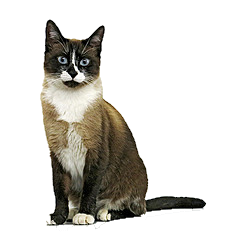

In [93]:
showimg(filename="kitty.png", embed=True)

We can open it with an encoding like `latin1` (which should be forgiving, because it is a one-byte-per-character encoding). This lets us look at the image as though it was text data:

In [94]:
kitty_as_text = open("kitty.png", "r", encoding="latin1").read()

In [95]:
print(kitty_as_text)

PNG

   
IHDR   ð   ð   >Ué  
AiCCPICC Profile  H
wTSÙÏ½7½Ð" %ôz	 Ò;HQIP&vDF)VdTÀG"cEb×	òPÆÁQDEåÝk	ï­5óÞýÇYßÙç·×Ùgï}×º PüÂtX4¡XîëÁ\ËÄ÷XÀáffGøDÔü½=¨HÆ³öî.d»Û,¿P&sÖÿ"7C$ 
EÕ6<~&åS³Å2ÿÊô)212¡	¢¬"ãÄ¯lö§æ+»É&ä¡YÎ¼4»PÞ%á£¡\%àg£|e½TI å÷(ÓÓøL 0_Ìç&¡l2Eîò Ä9¼rù9h x¦gäIb¦×iåèÈfúñ³Sùb1+ÃMáxLÏô´0¯oE%Ymhí­ííYÖæhù¿Ùß~Sý=ÈzûUñ&ìÏAYßlì¬/½ ö$Z³¾U ´m@åá¬Oï  ò ´Þól^Äâ'ììlsk.+è7ûoÊ¿9÷ËîûV;¦?#I3eEå¦§¦KDÌÌÏdý÷ÿãÀ9iÍÉÃ,ÀñèUQè	h»<X.d
Õá6'~khu_ }9P¸IÈo= C#$n?z}ë[1
È¾¼h­¯s2zþçú\náLA"Sæödr%¢,£ßlÁt 
4.0,`
3pÞ  H.Hi@²A>Ø 
A1Øvjp ÔzÐN6p\WÀ
pG@
ÁK0Þið¢Aª¤BÖZyCAP8ÅC@ùÐ&¨*ª¡CP=ô#tº]ú Ð 4ý}Óa
Ø ¶Ù°;GÂËàDxÀÛáJ¸>·Âáð ,_Â@ÈÑFXñDBX$!k"¤©E¤¹Hqä¡aÆãYábVaÖbJ0ÕcVLæ6f3ù¥bÕ±¦X'¬?v	6-ÄV``[°±Øaì;ÇÀâp~¸\2n5®·×»ëÃ
á&ñx¼*ÞïÁsðb|!¾
ßÆ¿'	Zk! $l$T

## Text files as bytes

Text files are just bytes, like any other file. Using the `rb` parameter, Python opens the text file *without* decoding it using a particular encoding. You end up with a `bytes` value, not a `str`. This gives us some strange flexibility.

In [96]:
text_bytes = open("frost.txt", "rb").read()

Let's plot the value of each byte using `matplotlib`.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

(You can ignore the details of the code—it's just drawing a graph. The `np.frombuffer(...)` bit creates a [`numpy`](https://numpy.org/) array from the byte buffer and converts it to an array of unsigned 8-bit integers. You can change the number of bytes to graph by changing the number after the colon.)

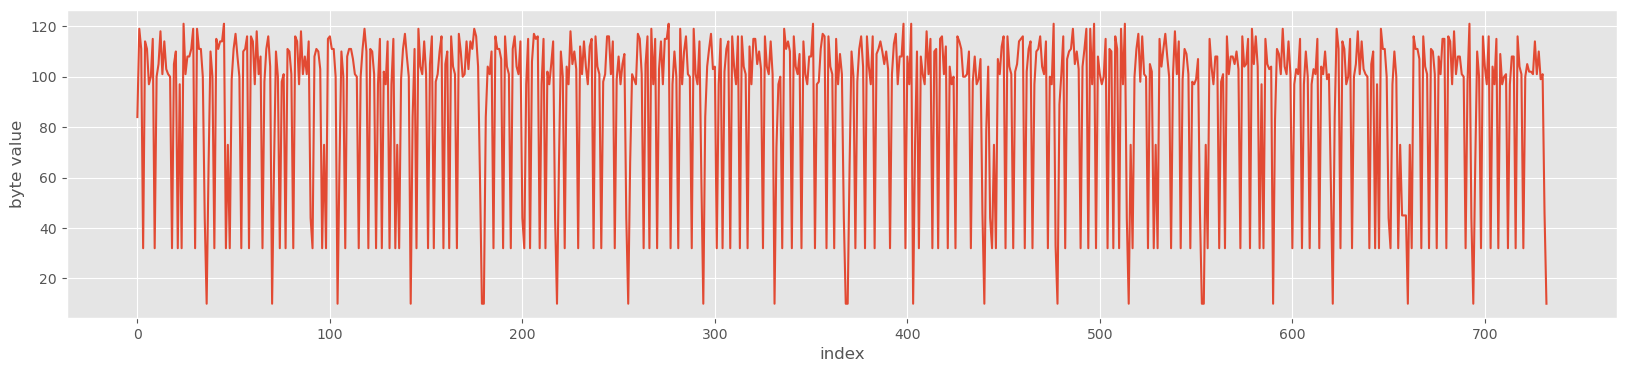

In [98]:
plt.figure(figsize=(20, 4))
plt.plot(np.frombuffer(text_bytes, dtype=np.uint8))
plt.ylabel('byte value')
plt.xlabel('index')
plt.show()

(You can actually see the structure of the text here a little bit!)

### Manipulating text files as images

Because text files are just bytes, we can re-use those bytes in creative ways. In this section of the notebook, we're going to treat those bytes as image data.

Before continuing, install Pillow. Type the following at the command line (making sure that you're invoking the same `python` that your Jupyter Notebook is using):

    pip install Pillow
    
Or if you're using Anaconda:

    conda install pillow
    
Our method for converting text into images:

* Load the text as bytes
* Use each sequence of three bytes as the red, green, and blue pixel values
* Pick an arbitrary width for the image (and pad the data so that it fits that width)

In [99]:
from PIL import Image, ImageOps, ImageFilter

Byte strings are one-dimensional, but images are two-dimensional. So we need to pick arbitrary dimensions for the image. I decided to make it 20 pixels wide, but you should pick a different value based on your own text and needs.

In [100]:
width = 20 # arbitrary, adjust to taste
padded_text_bytes = text_bytes + (b' ' * width * 3)
height = int((len(padded_text_bytes) / 3) / width)

Pillow's `Image.frombytes` function takes a byte sequence and makes an image with it, using the provided dimensions.

In [101]:
text_img = Image.frombytes('RGB', (width, height), padded_text_bytes)

Here's what it looks like:

In [102]:
text_img

This is a bit small, so we can resize it:

In [103]:
def show_scaled(img, scale=8):
    return img.resize((img.width*scale, img.height*scale))

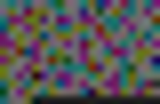

In [104]:
show_scaled(text_img)

Now that we have an image, Pillow can save it in any format we'd like—here's how to save it as a PNG:

In [105]:
text_img.save("text_img.png")

Now you could manipulate the image in a separate image editing program, then load it again like so:

In [106]:
loaded = Image.open("text_img.png")

Since we haven't changed the data at all, we should be able to recover the text from the image perfectly:

In [107]:
img_bytes = loaded.tobytes()

In [108]:
print(img_bytes)

b'Two roads diverged in a yellow wood,\nAnd sorry I could not travel both\nAnd be one traveler, long I stood\nAnd looked down one as far as I could\nTo where it bent in the undergrowth;\n\nThen took the other, as just as fair,\nAnd having perhaps the better claim,\nBecause it was grassy and wanted wear;\nThough as for that the passing there\nHad worn them really about the same,\n\nAnd both that morning equally lay\nIn leaves no step had trodden black.\nOh, I kept the first for another day!\nYet knowing how way leads on to way,\nI doubted if I should ever come back.\n\nI shall be telling this with a sigh\nSomewhere ages and ages hence:\nTwo roads diverged in a wood, and I---\nI took the one less travelled by,\nAnd that has made all the difference.\n                                               '


Nice! Now we can play around a bit: modify the image, then decode it as text. And see what happened! For functions you can use with Pillow images, see [Image reference](https://pillow.readthedocs.io/en/latest/reference/Image.html), [ImageFilter reference](https://pillow.readthedocs.io/en/latest/reference/ImageFilter.html), [ImageOps reference](https://pillow.readthedocs.io/en/latest/reference/ImageOps.html). (Or, you can open the image in an image editor, save it again, then open it with the `Image.open(...)` cell above!)

First, a little Gaussian blur:

In [109]:
gaussian = loaded.filter(ImageFilter.GaussianBlur(0.15))

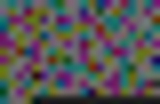

In [110]:
gaussian.resize((loaded.width*8, loaded.height*8))

In [111]:
print(gaussian.tobytes().decode('utf8', 'ignore'))

To#whbre it#benq in the&undergrowth;
Somewhere ades&akd"ages#hence:Two roads&divergdd#in a#wold,#and#I---
And teat#has#madd#ali!qhe difference.
                                               


Flipping the image vertically:

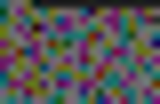

In [112]:
flipped = ImageOps.flip(loaded)
flipped.resize((loaded.width*8, loaded.height*8))

In [113]:
print(flipped.tobytes().decode('utf8', 'ignore'))

 difference.
                                               
I took the one less travelled by,
And that has made all the ages and ages hence:
Two roads diverged in a wood, and I---er come back.

I shall be telling this with a sigh
Somewhereet knowing how way leads on to way,
I doubted if I should evp had trodden black.
Oh, I kept the first for another day!
Yhe same,

And both that morning equally lay
In leaves no steh as for that the passing there
Had worn them really about te better claim,
Because it was grassy and wanted wear;
Thoug
Then took the other, as just as fair,
And having perhaps th one as far as I could
To where it bent in the undergrowth;
ravel both
And be one traveler, long I stood
And looked downTwo roads diverged in a yellow wood,
And sorry I could not t


Rotate 90 degrees:

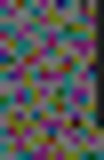

In [114]:
rotated = loaded.rotate(90, expand=True)
rotated.resize((rotated.width*8, rotated.height*8))

In [115]:
print(rotated.tobytes().decode('utf8', 'ignore'))

t townh;
 thougt tste!
Y evere---the    nod dowtaps
Thbouno dayuldewhd Ill    uldokergrerhar;y aes er shoSom ane a    co londeg p wealleavoth I gh
od,mad   y IAnde uvinted ren l an if si woas    orrod
 th hawanhemy
Ifortedh an at h   d ssto inAndnd n t last oubwitd itha   
An I entr,
y aworllyfirI dis rgend    od,ongt bfaiassad quahe y,
 thive,
A    wo, le ias  gre
Hg et t waings d by   lowlerherst washerninkep toelloadled   yelaveo w juit g tmor I  one to rvel    a  trd
T asse sinat Oh,adsl b
Twtra    inoneouler,caupas thk.
 lehalce:ss    gedbe I coth
Behe othlacwayI shen le   vernd as he im,t td bn bow .

es one
   dih
Aar k tclatha
Anddeg hack aghe ce.adsbots ftooer or e,
trowine bandk tren roel e aen etts fsamad knocomes tooffeTworav on
The bh ahe p het er  ag
I  di


Posterize (i.e., reduce the number of bits per color component):

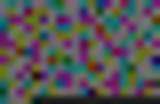

In [116]:
poster = ImageOps.posterize(loaded, 7)
poster.resize((loaded.width*8, loaded.height*8))

In [117]:
print(poster.tobytes().decode('utf8', 'ignore'))

Tvn rn`dr dhvdrfdd hn ` xdllnv vnnd,
@nd rnrrx H bntld nnt tr`vdl bnth
@nd bd nnd tr`vdldr, lnnf H rtnnd
@nd lnnjdd dnvn nnd `r f`r `r H bntld
Tn vhdrd ht bdnt hn thd tnddrfrnvth:

Thdn tnnj thd nthdr, `r jtrt `r f`hr,
@nd h`vhnf pdrh`pr thd bdttdr bl`hl,
Bdb`trd ht v`r fr`rrx `nd v`ntdd vd`r:
Thntfh `r fnr th`t thd p`rrhnf thdrd
H`d vnrn thdl rd`llx `bntt thd r`ld,

@nd bnth th`t lnrnhnf dpt`llx l`x
Hn ld`vdr nn rtdp h`d trndddn bl`bj.
Nh, H jdpt thd fhrrt fnr `nnthdr d`x 
Xdt jnnvhnf hnv v`x ld`dr nn tn v`x,
H dntbtdd hf H rhntld dvdr bnld b`bj.

H rh`ll bd tdllhnf thhr vhth ` rhfh
Rnldvhdrd `fdr `nd `fdr hdnbd:
Tvn rn`dr dhvdrfdd hn ` vnnd, `nd H,,,
H tnnj thd nnd ldrr tr`vdlldd bx,
@nd th`t h`r l`dd `ll thd dhffdrdnbd.
                                               


Resize the image:

In [118]:
resized = loaded.resize((loaded.width*4, loaded.height*4), resample=Image.NEAREST)

/var/folders/8r/3pg241bn1kvbv_hgjl31dyz00000gp/T/ipykernel_19716/121820089.py:1: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  resized = loaded.resize((loaded.width*4, loaded.height*4), resample=Image.NEAREST)


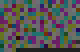

In [119]:
resized

In [120]:
print(resized.tobytes().decode('utf8', 'ignore'))

TwoTwoTwoTwo ro ro ro roadsadsadsads di di di diververververgedgedgedged in in in in a  a  a  a yelyelyelyellowlowlowlow wo wo wo wood,od,od,od,
An
An
An
And sd sd sd sorrorrorrorry Iy Iy Iy I co co co coulduldulduld no no no not tt tt tt tTwoTwoTwoTwo ro ro ro roadsadsadsads di di di diververververgedgedgedged in in in in a  a  a  a yelyelyelyellowlowlowlow wo wo wo wood,od,od,od,
An
An
An
And sd sd sd sorrorrorrorry Iy Iy Iy I co co co coulduldulduld no no no not tt tt tt tTwoTwoTwoTwo ro ro ro roadsadsadsads di di di diververververgedgedgedged in in in in a  a  a  a yelyelyelyellowlowlowlow wo wo wo wood,od,od,od,
An
An
An
And sd sd sd sorrorrorrorry Iy Iy Iy I co co co coulduldulduld no no no not tt tt tt tTwoTwoTwoTwo ro ro ro roadsadsadsads di di di diververververgedgedgedged in in in in a  a  a  a yelyelyelyellowlowlowlow wo wo wo wood,od,od,od,
An
An
An
And sd sd sd sorrorrorrorry Iy Iy Iy I co co co coulduldulduld no no no not tt tt tt travravravravel el el el botbotbotboth
Ah

## Text as audio

Because text is just bytes, we can also convert it to be audible. The following cell uses Jupyter Notebook's built-in *Audio* widget to let you "listen" to the bytes. It does this by first converting the bytes to an array floating-point values:

In [121]:
from IPython.display import Audio

In [122]:
Audio([(val-127)/128 for val in text_bytes], rate=1000)